# Optimizador de Cortes de Papel

In [1]:
!pip3 install ColabTurtle

  Created wheel for ColabTurtle: filename=ColabTurtle-2.0.0-cp36-none-any.whl size=4032 sha256=25796fbf4a6e97e4d3a6b176458fe3f5427947b2084db695f62a31f4a10e8d06
  Stored in directory: /root/.cache/pip/wheels/a8/29/ec/ad346f0042ae467cc74f4378916348faf975b07890651dcae7
Successfully built ColabTurtle


In [2]:
import ColabTurtle.Turtle
import random
import turtle
import numpy as np
import matplotlib.pyplot as plt

Crear nueva lista aleatoria de pedidos

In [3]:
pedidos_list = []
index = 0
for i in range(30):
  l = random.randint(10,70)
  a = random.randint(10,70)
  for j in range(random.randint(1,4)):
    pedidos_list.append([index,l,a,random.randint(0,1),random.randint(0,1)])
    index += 1

In [4]:
pedidos_list = sorted(pedidos_list, key=lambda x: x[1]*x[2],reverse=True) #Ordenar por Area

In [5]:
def graficar(x,y,largo,ancho):
  global scale
  x_off = 10
  y_off = 10
  
  tab.penup()
  tab.goto(scale*x+x_off, scale*y+y_off) #inicio
  # Dibujar Rectangulo
  tab.pendown()
  tab.goto(scale*x+scale*largo+x_off, scale*y+y_off) 
  tab.goto(scale*x+scale*largo+x_off, scale*y+scale*ancho+y_off)
  tab.goto(scale*x+x_off,             scale*y+scale*ancho+y_off)
  tab.goto(scale*x+x_off,             scale*y+y_off)
  tab.penup()

In [6]:
def graficar_sobrante(x,y,largo,ancho):
  global scale
  x_off = 10
  y_off = 10
  if largo != 0 and ancho != 0:
    tab.penup()
    tab.goto(scale*x+x_off, scale*y+y_off) #inicio
    # Dibujar X
    tab.pendown()
    tab.color('red')
    tab.goto(scale*x+scale*largo+x_off, scale*y+scale*ancho+y_off)  #abajo derecha
    tab.penup()
    tab.goto(scale*x+scale*largo+x_off, scale*y+y_off) #arriba derecha
    tab.pendown()
    tab.goto(scale*x+x_off,             scale*y+scale*ancho+y_off)  #abajo izquierda

    tab.penup()

In [7]:
tab = ColabTurtle.Turtle
scale = 1

In [8]:
def optimizar(pedidos, graf = True):
  tab = ColabTurtle.Turtle
  if graf:
    tab.initializeTurtle()
    tab.window_size = (800,500)
    tab.speed(10)
    tab.pen_width = 1
    tab.showturtle = True


  material = []
  material.append([0,0,0,0,0]) # coordenada x, coordenada y, largo, ancho | Inicio Papel
  scale = 1

  i=0
  area_utilizada = 0
  largo_utilizado = 0

  while(i < len(pedidos)):
    material = sorted(material, key=lambda x: x[4]) #Ordenar por Area

    if pedidos[i][3] == 0: # Si no esta rotado
      largo_pedido = pedidos[i][1]
      ancho_pedido = pedidos[i][2]
    else:
      largo_pedido = pedidos[i][2] # Si está rotado
      ancho_pedido = pedidos[i][1]

    area_utilizada += largo_pedido*ancho_pedido

    for j in range(len(material)): # Recorrer lista de materiales
      largo_material = material[j][2]
      ancho_material = material[j][3]
      x_material = material[j][0]
      y_material = material[j][1]

      if (largo_pedido <= largo_material and ancho_pedido <= ancho_material) or (largo_pedido <= ancho_material and ancho_pedido <= largo_material): # Si el pedido cabe dentro del material
        if (largo_pedido <= ancho_material and ancho_pedido <= largo_material) and (largo_pedido > largo_material or ancho_pedido > ancho_material): # Rotar
          piv = largo_pedido
          largo_pedido = ancho_pedido
          ancho_pedido = piv

        material.pop(j) #Eliminar material usado
        if pedidos[i][4] == 1: #Corte vertical primero
          largo_sobrante = largo_material - largo_pedido
          ancho_sobrante = ancho_material
          x_material_sobrante = x_material + largo_pedido
          y_material_sobrante = y_material
          material.append([x_material_sobrante, y_material_sobrante, largo_sobrante, ancho_sobrante,largo_sobrante*ancho_sobrante])
          
          if graf:
            graficar(x_material_sobrante,y_material_sobrante,largo_sobrante,ancho_sobrante)

          largo_sobrante = largo_pedido
          ancho_sobrante = ancho_material - ancho_pedido
          x_material_sobrante = x_material
          y_material_sobrante = y_material + ancho_pedido
          material.append([x_material_sobrante, y_material_sobrante, largo_sobrante, ancho_sobrante,largo_sobrante*ancho_sobrante])
          
          if graf:
            graficar(x_material_sobrante,y_material_sobrante,largo_sobrante,ancho_sobrante)
          
        else:                   #Corte horizontal primero
          largo_sobrante = largo_material
          ancho_sobrante = ancho_material - ancho_pedido
          x_material_sobrante = x_material
          y_material_sobrante = y_material + ancho_pedido
          material.append([x_material_sobrante, y_material_sobrante, largo_sobrante, ancho_sobrante,largo_sobrante*ancho_sobrante])
          
          if graf:
            graficar(x_material_sobrante,y_material_sobrante,largo_sobrante,ancho_sobrante)

          largo_sobrante = largo_material - largo_pedido
          ancho_sobrante = ancho_pedido
          x_material_sobrante = x_material + largo_pedido
          y_material_sobrante = y_material
          material.append([x_material_sobrante, y_material_sobrante, largo_sobrante, ancho_sobrante,largo_sobrante*ancho_sobrante])
          
          if graf:
            graficar(x_material_sobrante,y_material_sobrante,largo_sobrante,ancho_sobrante)
    
        break # Salir del ciclo que recorre la liste de materiales

      else: # Si el pedido no cabe en el material
        if j == len(material)-1: # ...Y es el ultimo material disponible

          material.append([ largo_utilizado%600, 110*int(largo_utilizado/600), largo_pedido, 100, largo_pedido*100 ]) # Sumar un corte
          largo_utilizado += largo_pedido
          pedidos_list[-1][4] = 1 #Forzar corte vertical del nuevo elemento del pedido
          if graf:
            graficar(material[-1][0],material[-1][1],material[-1][2],material[-1][3])
          i -= 1
          area_utilizada -= largo_pedido*ancho_pedido
    i += 1
          

  area_perdida = 0
  piezas_sobrantes = 0
  for j in range(len(material)): # Recorrer lista de materiales sobrantes
      largo_material = material[j][2]
      ancho_material = material[j][3]
      x_material = material[j][0]
      y_material = material[j][1]
      area_perdida += largo_material*ancho_material
      if area_perdida > 0:
        piezas_sobrantes += 1
      if graf:
        graficar_sobrante(x_material,y_material,largo_material,ancho_material)

  #print("Area Utilizada:", area_utilizada," | Piezas Sobrantes:", piezas_sobrantes,"Area Sobrante:", area_perdida)

  return area_perdida

Realizar serie de pruebas aleatorias

In [11]:
min = 9999999
best_list=[]
score_list=[]
for i in range(50):
  pedidos_list_rand = []
  for j in range(len(pedidos_list)): #Crear nueva lista con los mismos Pedidos en distinto orden, con rotacion y tipo de corte aleatorio
    pedidos_list_rand.append((pedidos_list[j][0], pedidos_list[j][1], pedidos_list[j][2], random.randint(0,1), random.randint(0,1)))

  random.shuffle(pedidos_list_rand)
  score = optimizar(pedidos_list_rand, graf=False)
  score_list.append(score)

  if score < min:
    best_list = pedidos_list_rand.copy()
    min = score
    #print("Minimo")

print("Minimo:",min)
print("Best List")
optimizar(best_list, graf=False)

Minimo: 13397
Best List


13397

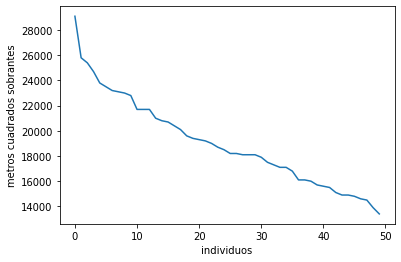

Mejor Resultado: 13397


In [13]:
score_list = sorted(score_list, reverse=True) #Ordenar poblacion segun material sobrante de menor a mayor

x = np.arange(len(score_list))
y1 = np.array(score_list)

plt.xlabel('individuos')
plt.ylabel('metros cuadrados sobrantes')
plt.plot(x,y1)
plt.show()

print("Mejor Resultado:", score_list[-1] )

In [15]:
score_list


[29097,
 25797,
 25397,
 24697,
 23797,
 23497,
 23197,
 23097,
 22997,
 22797,
 21697,
 21697,
 21697,
 20997,
 20797,
 20697,
 20397,
 20097,
 19597,
 19397,
 19297,
 19197,
 18997,
 18697,
 18497,
 18197,
 18197,
 18097,
 18097,
 18097,
 17897,
 17497,
 17297,
 17097,
 17097,
 16797,
 16097,
 16097,
 15997,
 15697,
 15597,
 15497,
 15097,
 14897,
 14897,
 14797,
 14597,
 14497,
 13897,
 13397]

In [ ]:
optimizar(best_list, graf=True)

# Algoritmo Genético

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

Generar lista aleatoria de pedidos

In [17]:
n_piezas = 30
pedidos_list = []
index = 0
for i in range(n_piezas):
  l = random.randint(10,70)
  a = random.randint(10,70)
  for j in range(random.randint(1,4)):
    pedidos_list.append([index,l,a,random.randint(0,1),random.randint(0,1)])
    index += 1

In [22]:
def cruce(progen_1, progen_2):
  hijo_1 = []
  hijo_2 = []
  pedidos_agregados_1 = []
  pedidos_agregados_2 = []

  for i in range(int(len(progen_1)/2)): # Primera mitad de los genes
    hijo_1.append(progen_1[i])   # Hijo 1 es como el progenitor 1
    pedidos_agregados_1.append(progen_1[i][0])
    hijo_2.append(progen_2[i])   # Hijo 2 es como el progenitor 2
    pedidos_agregados_2.append(progen_2[i][0])
  
  for i in range(len(progen_1)-1): # Recorrer todos los genes
    if progen_1[i][0] not in pedidos_agregados_2: # Si el elemento del progenitor 1 no esta en la lista del hijo 2
      hijo_2.append(progen_1[i])                  # Agregar gen del progenitor 1 al hijo 2
    if progen_2[i][0] not in pedidos_agregados_1: # Si el elemento del progenitor 2 no esta en la lista del hijo 1
      hijo_1.append(progen_2[i])                  # Agregar gen del progenitor 2 al hijo 1  

  if random.random() < factor_mutacion:          # Agregar mutacion al hijo 1
    index_1 = random.randint(0,len(progen_1)-2)
    index_2 = random.randint(0,len(progen_1)-2)
    hijo_1[index_1], hijo_1[index_2] = hijo_1[index_2], hijo_1[index_1]

  if random.random() < factor_mutacion:         # Agregar mutacion al hijo 2
    index_1 = random.randint(0,len(progen_1)-2)
    index_2 = random.randint(0,len(progen_1)-2)
    hijo_2[index_1], hijo_2[index_2] = hijo_2[index_2], hijo_2[index_1]

  if random.random() < factor_mutacion:          # Agregar mutacion al hijo 1
    index_1 = random.randint(0,len(progen_1)-2)
    hijo_1[index_1] = (hijo_1[index_1][0],hijo_1[index_1][1],hijo_1[index_1][2],random.randint(0,1),random.randint(0,1))

  if random.random() < factor_mutacion:         # Agregar mutacion al hijo 2
    index_1 = random.randint(0,len(progen_1)-2)
    hijo_2[index_1] = (hijo_2[index_1][0],hijo_2[index_1][1],hijo_2[index_1][2],random.randint(0,1),random.randint(0,1))

  return hijo_1, hijo_2

Generar poblacion inicial aleatoriamente

In [18]:
n_indviduos = 50
generaciones = 100
factor_mutacion = 0.5

In [19]:
poblacion = []
score_list = []
counts = 0
for i in range(n_indviduos):
  pedidos_list_rand = []
  for j in range(len(pedidos_list)): #Crear nueva lista con los mismos Pedidos en distinto orden, con rotacion y tipo de corte aleatorio
    pedidos_list_rand.append((pedidos_list[j][0], pedidos_list[j][1], pedidos_list[j][2], random.randint(0,1), random.randint(0,1)))
  random.shuffle(pedidos_list_rand)
  score = optimizar(pedidos_list_rand, graf=False)
  pedidos_list_rand.append(score)
  score_list.append(score)
  poblacion.append(pedidos_list_rand)


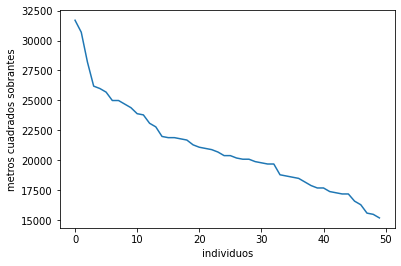

Mejor Resultado: 15193


In [20]:
score_list = sorted(score_list, reverse=True) #Ordenar poblacion segun material sobrante de menor a mayor

x = np.arange(len(score_list))
y1 = np.array(score_list)

plt.xlabel('individuos')
plt.ylabel('metros cuadrados sobrantes')
plt.plot(x,y1)
plt.show()

print("Mejor Resultado:", score_list[-1] )

Ciclo evolutivo

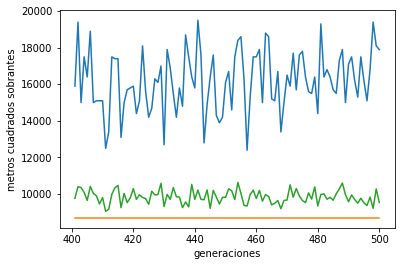

Mejor Resultado: 8693


In [27]:
best_score_list = []
worst_score_list = []
mean_score_list = []

for g in range(generaciones):
  counts += 1
  poblacion = sorted(poblacion, key=lambda x: x[:][-1]) #Ordenar poblacion segun material sobrante de menor a mayor
  best_score_list.append(poblacion[0][-1])    # Primer individuo
  worst_score_list.append(poblacion[-1][-1])  # Ultimo individuo
  mean_score_list.append(mean([item[-1] for item in poblacion]))
  poblacion_apta = poblacion[:int(len(poblacion)/2)] #Seleccionar a la mitad de la poblacion mas apta
  random.shuffle(poblacion_apta) #Desordenar aleatoriamente poblacion apta

  poblacion = poblacion_apta.copy() #Reiniciar Poblacion con los más aptos de la generacion anterior

  for i in range(int(len(poblacion_apta)/2)):
    hijo_1, hijo_2 = cruce(poblacion_apta[2*i],poblacion_apta[2*i+1]) #Generar nuevos individuos
    score = optimizar(hijo_1, graf=False)     # Evaluar aptitud de Hijo 1
    hijo_1.append(score)                      # Agregar score a la lista del Hijo 1
    poblacion.append(hijo_1)                  # Agregar Hijo 1 a la poblacion
    score = optimizar(hijo_2, graf=False)
    hijo_2.append(score)
    poblacion.append(hijo_2)

x = np.arange(counts-generaciones,counts)
y1 = np.array(best_score_list)
y2 = np.array(worst_score_list)
y3 = np.array(mean_score_list)

plt.xlabel('generaciones')
plt.ylabel('metros cuadrados sobrantes')
plt.plot(x,y2)
plt.plot(x,y1)
plt.plot(x,y3)
plt.show()

print("Mejor Resultado:", best_score_list[-1] )

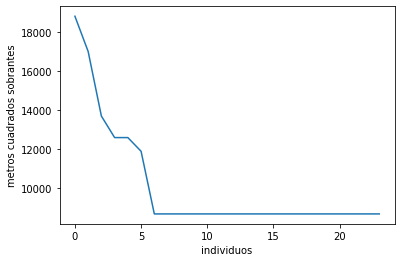

Mejor Resultado: 8693  |   Peor Resultado 18793


In [28]:
score_list = []

poblacion = sorted(poblacion, key=lambda x: x[:][-1], reverse=True) #Ordenar poblacion segun material sobrante de menor a mayor

for i in range(len(poblacion)):
  score_list.append(poblacion[i][-1])

x = np.arange(len(score_list))
y1 = np.array(score_list)

plt.xlabel('individuos')
plt.ylabel('metros cuadrados sobrantes')
plt.plot(x,y1)
plt.show()

print("Mejor Resultado:", score_list[-1], " |   Peor Resultado", score_list[0] )

In [ ]:
for i in range(len(poblacion)):
  print(poblacion[i][-1])

In [ ]:
for i in range(len(poblacion)):
  print(poblacion[i][-1])

In [31]:
poblacion = sorted(poblacion, key=lambda x: x[:][-1]) #Ordenar poblacion segun material sobrante de menor a mayor
optimizar(poblacion[0][:-1], graf=True)

8693

In [32]:
optimizar(poblacion[-1][:-1], graf=True)


18793